In [1]:
!pip install pyodbc sqlalchemy pandas

  Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl (11.6 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandasai 2.2.12 requires pandas==1.5.3, but you have pandas 2.2.3 which is incompatible.
ydata-profiling 4.7.0 requires visions[type_image_path]<0.7.7,>=0.7.5, but you have visions 0.7.4 which is incompatible.
streamlit 1.30.0 requires packaging<24,>=16.8, but you have packaging 24.1 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<h1>1. Load and Inspect the Data</h1>
Start by importing necessary libraries and loading the dataset. Then, inspect the structure and preview the data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
file_path = 'Hotel Bookings.csv'
df = pd.read_csv(file_path)

In [4]:
# Check dataset structure
print("Dataset Info:")
print(df.info())  # Check column types and null values


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  me

In [5]:
# Preview first few rows
print("\nFirst 5 rows:")
print(df.head())



First 5 rows:
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No De

In [6]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")



Number of duplicate rows: 31994


<h1>2. Handle Missing Data</h1>
Analyze and handle missing values based on their impact.

In [7]:
# Check missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Example handling:
# - Fill 'children' with 0
df['children'].fillna(0, inplace=True)

# - Fill 'country' with 'Unknown'
df['country'].fillna('Unknown', inplace=True)

# - Drop 'company' due to excessive missing values
df.drop(columns=['company'], inplace=True)

# Verify
print("\nAfter handling missing values:")
print(df.isnull().sum().sum())  # Should be 0 if all are addressed



Missing Values:
children         4
country        488
agent        16340
company     112593
dtype: int64

After handling missing values:
16340


C:\Users\prach\AppData\Local\Temp\ipykernel_8560\3660550269.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0, inplace=True)
C:\Users\prach\AppData\Local\Temp\ipykernel_8560\3660550269.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

<h1>3. Analyze Cancellation Rates</h1>
Explore cancellation trends and key drivers.


In [8]:
# Calculate cancellation rate
cancellation_rate = df['is_canceled'].mean() * 100
print(f"\nOverall Cancellation Rate: {cancellation_rate:.2f}%")

# Analyze cancellation rates by hotel
cancel_by_hotel = df.groupby('hotel')['is_canceled'].mean() * 100
print("\nCancellation Rate by Hotel Type:")
print(cancel_by_hotel)



Overall Cancellation Rate: 37.04%

Cancellation Rate by Hotel Type:
hotel
City Hotel      41.726963
Resort Hotel    27.763355
Name: is_canceled, dtype: float64


<h1>4. Explore Booking Trends</h1>
Investigate trends over time to identify peak seasons and patterns.

In [9]:
# Convert 'arrival_date_month' to ordered categorical data
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
                'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=months_order, ordered=True)

# Monthly booking count
monthly_bookings = df['arrival_date_month'].value_counts(sort=False)
print("\nMonthly Booking Count:")
print(monthly_bookings)

# Yearly trends
yearly_bookings = df['arrival_date_year'].value_counts()
print("\nYearly Booking Count:")
print(yearly_bookings)



Monthly Booking Count:
arrival_date_month
January       5929
February      8068
March         9794
April        11089
May          11791
June         10939
July         12661
August       13877
September    10508
October      11160
November      6794
December      6780
Name: count, dtype: int64

Yearly Booking Count:
arrival_date_year
2016    56707
2017    40687
2015    21996
Name: count, dtype: int64


<h1>5. Customer Demographics</h1>
Analyze customer distribution and preferences.

In [10]:
# Top countries
top_countries = df['country'].value_counts().head(10)
print("\nTop 10 Countries of Customers:")
print(top_countries)

# Customer types
customer_types = df['customer_type'].value_counts()
print("\nCustomer Types:")
print(customer_types)



Top 10 Countries of Customers:
country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: count, dtype: int64

Customer Types:
customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64


<h1>6. Revenue Analysis</h1>

Analyze revenue metrics like Average Daily Rate (ADR) and total revenue.

In [11]:
# Revenue by hotel type
revenue_by_hotel = df.groupby('hotel')['adr'].sum()
print("\nRevenue by Hotel Type:")
print(revenue_by_hotel)

# Average Daily Rate (ADR) analysis
average_adr = df['adr'].mean()
print(f"\nAverage Daily Rate (ADR): {average_adr:.2f}")



Revenue by Hotel Type:
hotel
City Hotel      8353803.24
Resort Hotel    3803814.36
Name: adr, dtype: float64

Average Daily Rate (ADR): 101.83


<h1>7. Visualizations</h1>
Visualize key insights with plots.

C:\Users\prach\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


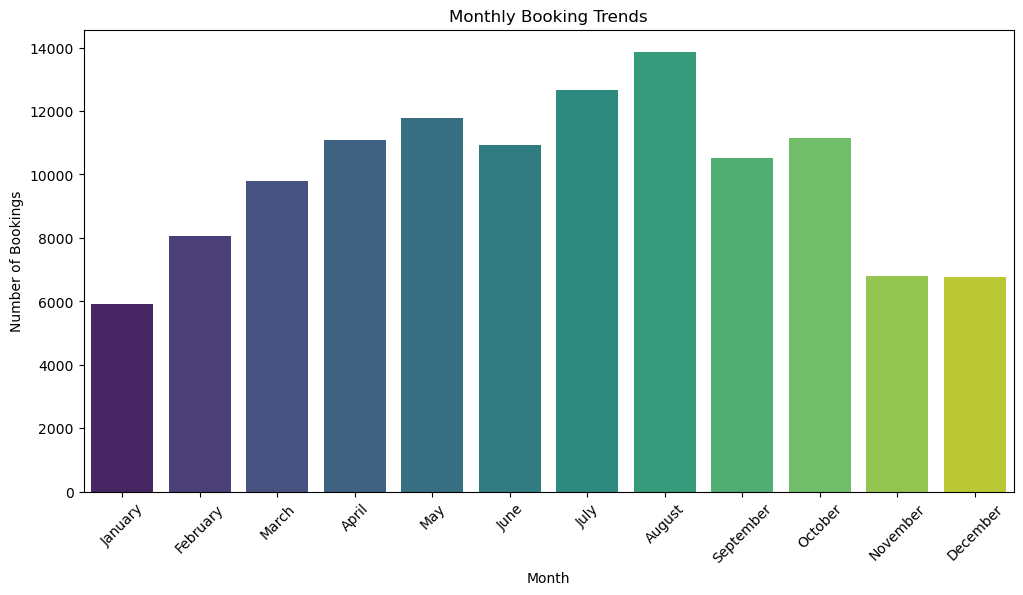

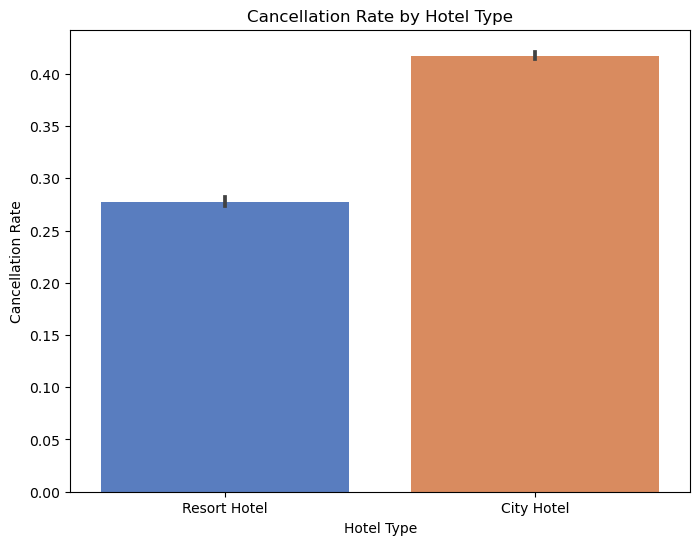

C:\Users\prach\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


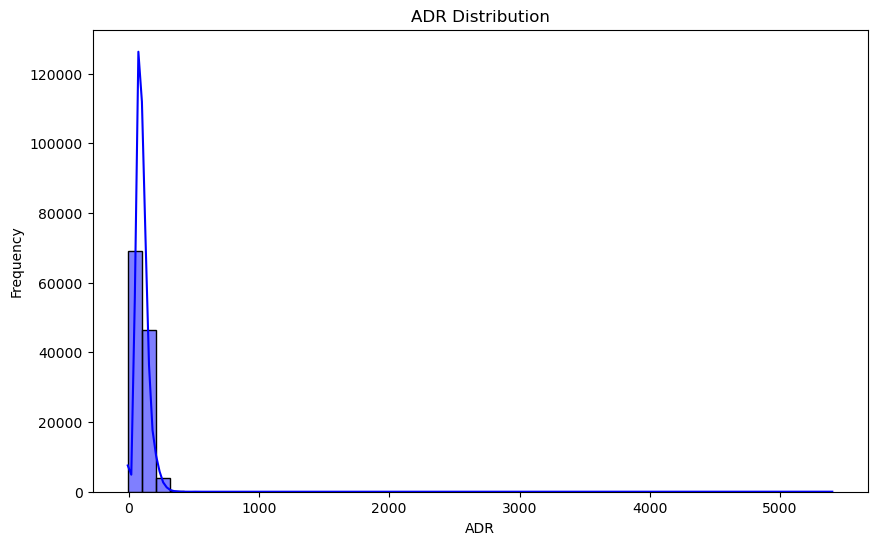

In [12]:
# Monthly booking trend
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='arrival_date_month', palette='viridis', order=months_order)
plt.title('Monthly Booking Trends')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

# Cancellation rate by hotel type
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='hotel', y='is_canceled', palette='muted')
plt.title('Cancellation Rate by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Cancellation Rate')
plt.show()

# Average Daily Rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['adr'], bins=50, kde=True, color='blue')
plt.title('ADR Distribution')
plt.xlabel('ADR')
plt.ylabel('Frequency')
plt.show()


In [13]:
# Save cleaned dataset
cleaned_file_path = 'Cleaned_Hotel_Bookings.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")


Cleaned dataset saved to Cleaned_Hotel_Bookings.csv


<h1>Summary of Key Insights to Explore</h1>

-Cancellation rate differences between Resort Hotel and City Hotel.

-Peak booking months and off-peak periods.

-Distribution of customer origins (countries).

-Revenue and ADR trends across hotel types.